In [3]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
!pip install deepface

In [5]:
!git clone https://github.com/serengil/deepface.git

Cloning into 'deepface'...
remote: Enumerating objects: 4004, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 4004 (delta 44), reused 67 (delta 42), pack-reused 3928
Receiving objects: 100% (4004/4004), 49.64 MiB | 17.93 MiB/s, done.
Resolving deltas: 100% (2471/2471), done.


In [4]:
%cd deepface

/content/drive/MyDrive/deepface


In [ ]:
!pip install -e .

In [7]:
from deepface import DeepFace

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


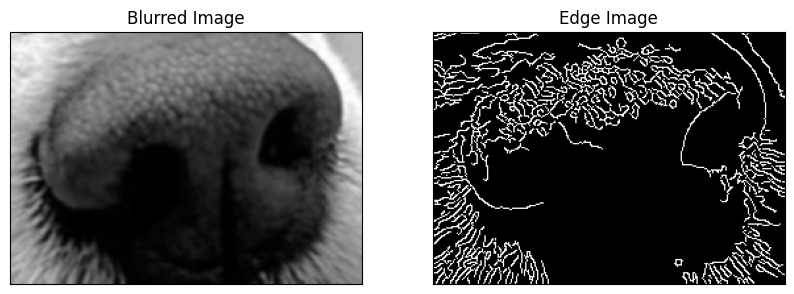

In [34]:
import cv2
import matplotlib.pyplot as plt

img2_path = "/content/drive/MyDrive/dog_nose/test_images/nose/dog5_1.png"

# 이미지 불러오기
image = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE) 

# 가우시안 블러 적용
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# 캐니 에지 검출 적용
edges = cv2.Canny(blurred, threshold1=30, threshold2=100)

# 결과 출력
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(blurred, cmap='gray')
plt.title('Blurred Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()


In [47]:
img1_path = "/content/drive/MyDrive/dog_nose/test_images/nose/dog3_1.png"
img2_path = "/content/drive/MyDrive/dog_nose/test_images/nose/dog6_2.png"


In [76]:
import os
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from scipy.spatial import distance
import numpy as np

# 미리 학습된 VGG16 모델 불러오기
model = VGG16(weights='imagenet', include_top=False)

# 이미지 불러오기
img1_path = "/content/drive/MyDrive/dog_nose/test_images/dog6_2.png"
img1 = image.load_img(img1_path, target_size=(224, 224))
x1 = image.img_to_array(img1)
x1 = np.expand_dims(x1, axis=0)
x1 = preprocess_input(x1)
features1 = model.predict(x1)
features1 = features1.flatten()

# 비교할 이미지가 있는 디렉토리 경로
image_dir = "/content/drive/MyDrive/dog_nose/test_images/nose"

# 특징 맵 시각화를 위한 함수
def visualize_feature_map(feature_map):
    # 특징 맵의 크기
    _, _, _, num_channels = feature_map.shape
    
    # 특징 맵 시각화
    plt.figure(figsize=(15, 15))
    for i in range(num_channels):
        plt.subplot(1, num_channels, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(feature_map[0, :, :, i], cmap='viridis')
    plt.show()


# 가장 유사도가 높은 이미지와 그 유사도를 저장할 변수
most_similar_image = None
highest_similarity = -1

for filename in os.listdir(image_dir):
    img2_path = os.path.join(image_dir, filename)

    # 디렉토리인 경우 건너뛰기
    if os.path.isdir(img2_path):
        continue
    
    # 비교할 이미지 불러오기
    img2 = image.load_img(img2_path, target_size=(224, 224))
    x2 = image.img_to_array(img2)
    x2 = np.expand_dims(x2, axis=0)
    x2 = preprocess_input(x2)
    features2 = model.predict(x2)

    # # 특징 맵 시각화
    # visualize_feature_map(features2)

    features2 = features2.flatten()
    
    # 유사도 계산
    similarity = 1 - distance.cosine(features1, features2)
    
    # 현재까지 가장 높은 유사도를 가진 이미지를 저장
    if similarity > highest_similarity:
        highest_similarity = similarity
        most_similar_image = filename

print(f'Most similar image: {most_similar_image}')
print(f'Highest similarity: {highest_similarity}')


1/1 [==============================] - 1s 1s/step
Most similar image: dog6_1.png
Highest similarity: 0.33558040857315063


In [77]:
import os
from tensorflow.keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.preprocessing import image
from scipy.spatial import distance
import numpy as np

# 미리 학습된 Xception 모델 불러오기
model = Xception(weights='imagenet', include_top=False)

# 이미지 불러오기
img1_path = "/content/drive/MyDrive/dog_nose/test_images/dog6_2.png"
img1 = image.load_img(img1_path, target_size=(299, 299))
x1 = image.img_to_array(img1)
x1 = np.expand_dims(x1, axis=0)
x1 = preprocess_input(x1)
features1 = model.predict(x1)
features1 = features1.flatten()

# 비교할 이미지가 있는 디렉토리 경로
image_dir = "/content/drive/MyDrive/dog_nose/test_images/nose"

# 가장 유사도가 높은 이미지와 그 유사도를 저장할 변수
most_similar_image = None
highest_similarity = -1

for filename in os.listdir(image_dir):
    img2_path = os.path.join(image_dir, filename)

    # 디렉토리인 경우 건너뛰기
    if os.path.isdir(img2_path):
        continue
    
    # 비교할 이미지 불러오기
    img2 = image.load_img(img2_path, target_size=(299, 299))
    x2 = image.img_to_array(img2)
    x2 = np.expand_dims(x2, axis=0)
    x2 = preprocess_input(x2)
    features2 = model.predict(x2)
    features2 = features2.flatten()
    
    # 유사도 계산
    similarity = 1 - distance.cosine(features1, features2)
    
    # 현재까지 가장 높은 유사도를 가진 이미지를 저장
    if similarity > highest_similarity:
        highest_similarity = similarity
        most_similar_image = filename

print(f'Most similar image: {most_similar_image}')
print(f'Highest similarity: {highest_similarity}')


1/1 [==============================] - 0s 384ms/step
Most similar image: dog6_1.png
Highest similarity: 0.3892963230609894


In [92]:
import os
from tensorflow.keras.applications.efficientnet import EfficientNetB4, preprocess_input
from tensorflow.keras.preprocessing import image
from scipy.spatial import distance
import numpy as np

# 미리 학습된 EfficientNet-B4 모델 불러오기
model = EfficientNetB4(weights='imagenet', include_top=False)

# 이미지 불러오기
img1_path = "/content/drive/MyDrive/dog_nose/test_images/dog6_2.png"
img1 = image.load_img(img1_path, target_size=(380, 380))
x1 = image.img_to_array(img1)
x1 = np.expand_dims(x1, axis=0)
x1 = preprocess_input(x1)
features1 = model.predict(x1)
features1 = features1.flatten()

# 비교할 이미지가 있는 디렉토리 경로
image_dir = "/content/drive/MyDrive/dog_nose/test_images/nose"

# 가장 유사도가 높은 이미지와 그 유사도를 저장할 변수
most_similar_image = None
highest_similarity = -1

for filename in os.listdir(image_dir):
    img2_path = os.path.join(image_dir, filename)

    # 디렉토리인 경우 건너뛰기
    if os.path.isdir(img2_path):
        continue
    
    # 비교할 이미지 불러오기
    img2 = image.load_img(img2_path, target_size=(380, 380))
    x2 = image.img_to_array(img2)
    x2 = np.expand_dims(x2, axis=0)
    x2 = preprocess_input(x2)
    features2 = model.predict(x2)
    features2 = features2.flatten()
    
    # 유사도 계산
    similarity = 1 - distance.cosine(features1, features2)
    print(similarity)
    # 현재까지 가장 높은 유사도를 가진 이미지를 저장
    if similarity > highest_similarity:
        highest_similarity = similarity
        most_similar_image = filename

print(f'Most similar image: {most_similar_image}')
print(f'Highest similarity: {highest_similarity}')


1/1 [==============================] - 0s 471ms/step
0.17507511377334595
1/1 [==============================] - 0s 474ms/step
0.26495644450187683
1/1 [==============================] - 0s 480ms/step
0.18425364792346954
1/1 [==============================] - 0s 495ms/step
0.3844349980354309
Most similar image: dog6_1.png
Highest similarity: 0.3844349980354309


In [91]:
import os
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input
from tensorflow.keras.preprocessing import image
from scipy.spatial import distance
import numpy as np

# 미리 학습된 DenseNet121 모델 불러오기
model = DenseNet121(weights='imagenet', include_top=False)

# 이미지 불러오기
img1_path = "/content/drive/MyDrive/dog_nose/test_images/dog6_2.png"
img1 = image.load_img(img1_path, target_size=(224, 224))
x1 = image.img_to_array(img1)
x1 = np.expand_dims(x1, axis=0)
x1 = preprocess_input(x1)
features1 = model.predict(x1)
features1 = features1.flatten()

# 비교할 이미지가 있는 디렉토리 경로
image_dir = "/content/drive/MyDrive/dog_nose/test_images/nose"

# 가장 유사도가 높은 이미지와 그 유사도를 저장할 변수
most_similar_image = None
highest_similarity = -1

for filename in os.listdir(image_dir):
    img2_path = os.path.join(image_dir, filename)

    # 디렉토리인 경우 건너뛰기
    if os.path.isdir(img2_path):
        continue
    
    # 비교할 이미지 불러오기
    img2 = image.load_img(img2_path, target_size=(224, 224))
    x2 = image.img_to_array(img2)
    x2 = np.expand_dims(x2, axis=0)
    x2 = preprocess_input(x2)
    features2 = model.predict(x2)
    features2 = features2.flatten()
    
    # 유사도 계산
    similarity = 1 - distance.cosine(features1, features2)
    print(similarity)
    # 현재까지 가장 높은 유사도를 가진 이미지를 저장
    if similarity > highest_similarity:
        highest_similarity = similarity
        most_similar_image = filename

print(f'Most similar image: {most_similar_image}')
print(f'Highest similarity: {highest_similarity}')


1/1 [==============================] - 0s 191ms/step
0.38049083948135376
1/1 [==============================] - 0s 197ms/step
0.4346827566623688
1/1 [==============================] - 0s 218ms/step
0.38307303190231323
1/1 [==============================] - 0s 212ms/step
0.5265436768531799
Most similar image: dog6_1.png
Highest similarity: 0.5265436768531799


1/1 [==============================] - 4s 4s/step


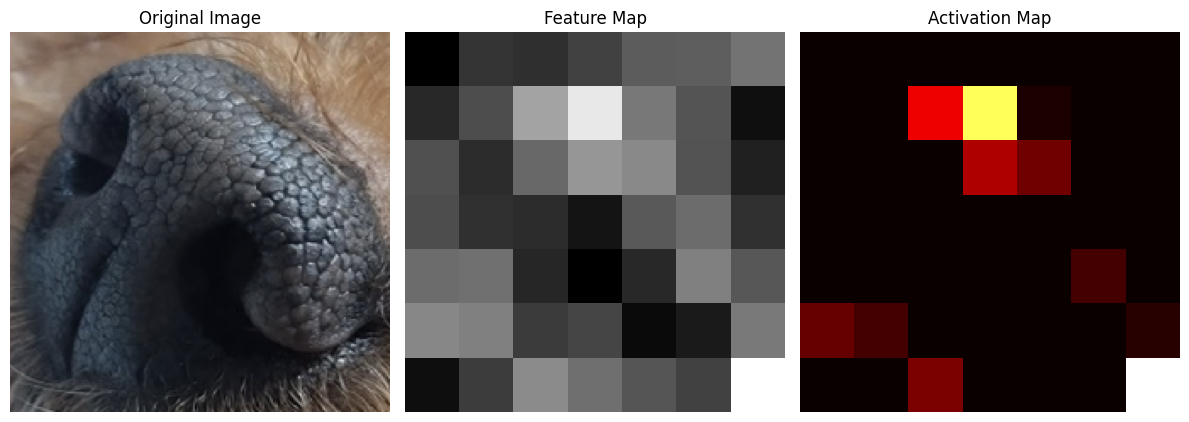

In [86]:
(import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 특정 층의 출력을 얻기 위한 층의 이름 지정
layer_name = 'conv5_block16_concat'

# 특정 층의 출력을 얻기 위한 모델 생성
model = tf.keras.models.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

# 이미지 불러오기 및 전처리
img_path = "/content/drive/MyDrive/dog_nose/test_images/dog6_2.png"
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = tf.keras.applications.densenet.preprocess_input(x)

# 이미지의 특징 맵 및 활성화 맵 계산
feature_maps = model.predict(x)
activations = tf.keras.activations.relu(feature_maps)

# 색상 맵 선택 (예: 'hot', 'cool', 'jet' 등)
cmap_name = 'hot'
cmap = plt.get_cmap(cmap_name)

# 특징 맵과 활성화 맵 시각화
plt.figure(figsize=(12, 6))

# 원본 이미지
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

# 특징 맵
plt.subplot(1, 3, 2)
plt.imshow(feature_maps[0, :, :, 0], cmap='gray')
plt.title('Feature Map')
plt.axis('off')

# 활성화 맵
plt.subplot(1, 3, 3)
plt.imshow(activations[0, :, :, 0], cmap=cmap)
plt.title('Activation Map')
plt.axis('off')

plt.tight_layout()
plt.show()


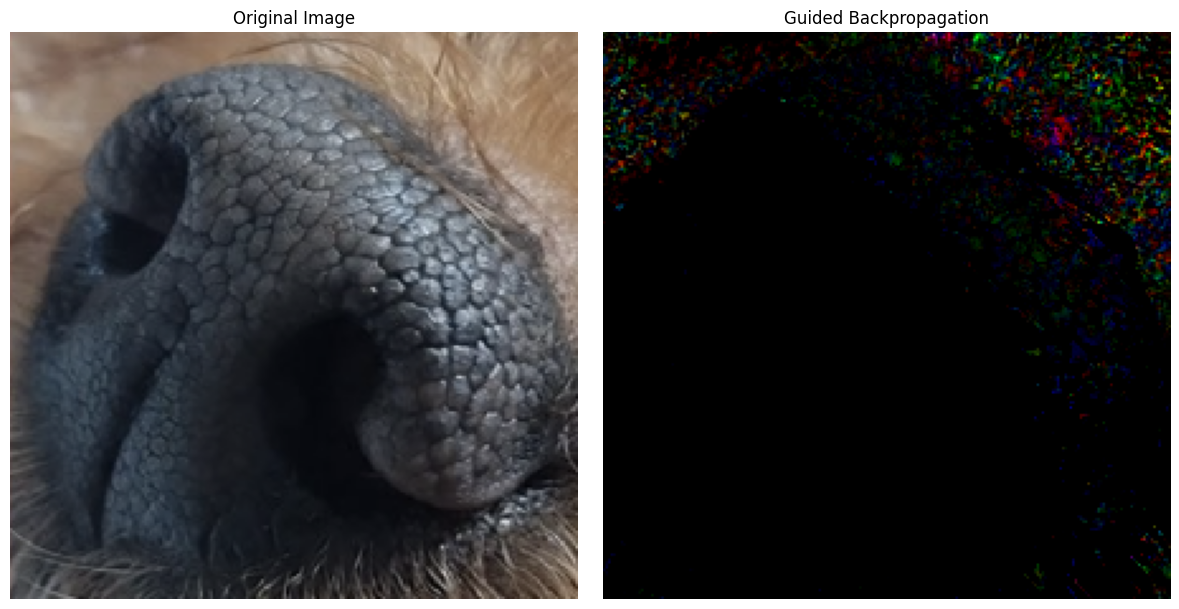

In [89]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def guided_backpropagation(model, image):
    # 입력 이미지에 대한 그래디언트 계산
    image = tf.convert_to_tensor(image)
    with tf.GradientTape() as tape:
        tape.watch(image)
        predictions = model(image)
        top_prediction = tf.argmax(predictions[0])
        top_class_output = predictions[:, top_prediction]
    grads = tape.gradient(top_class_output, image)[0]

    # ReLU에 대한 양수 그래디언트만 남기기
    guided_grads = tf.cast(image > 0, 'float32') * tf.cast(grads > 0, 'float32') * grads

    return guided_grads

# 모델과 이미지 불러오기
model = tf.keras.applications.DenseNet121(weights='imagenet')
# img_path = 'your_image_path.jpg'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = tf.keras.applications.densenet.preprocess_input(x)

# Guided Backpropagation을 사용하여 활성화된 영역 시각화
guided_grads = guided_backpropagation(model, x)
heatmap = np.maximum(guided_grads, 0)
heatmap = np.squeeze(heatmap)  # 1차원 차원 축소
heatmap /= np.max(heatmap)

# 원본 이미지와 활성화된 영역 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(heatmap, cmap='jet')  # 색상 맵 변경
plt.title('Guided Backpropagation')
plt.axis('off')

plt.tight_layout()
plt.show()


1/1 [==============================] - 1s 709ms/step


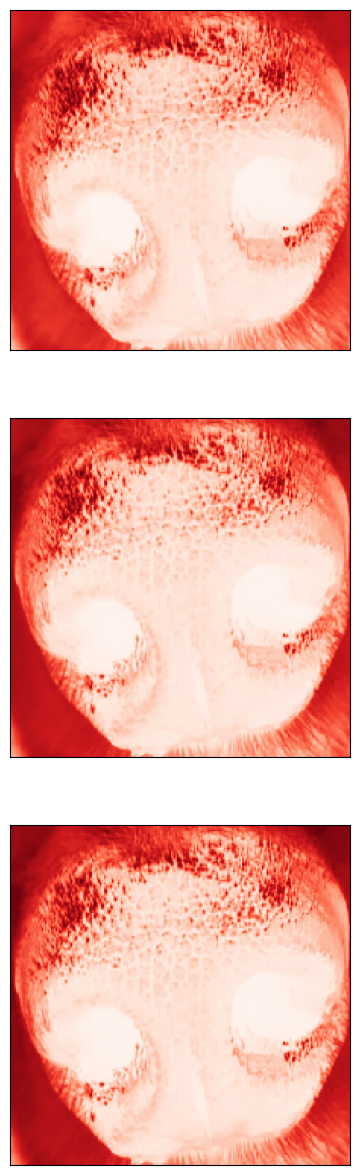

In [63]:
import tensorflow as tf
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# VGG16 모델 불러오기
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False)

# 중간 계층의 출력을 리스트로 가져오기
layer_outputs = [layer.output for layer in base_model.layers]

# 중간 계층의 출력을 사용하는 모델 생성
model = Model(inputs=base_model.input, outputs=layer_outputs)

# 이미지를 VGG16 모델이 학습된 데이터셋의 분포에 맞게 전처리
img = tf.keras.preprocessing.image.load_img(img1_path, target_size=(224, 224))
img = tf.keras.preprocessing.image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = tf.keras.applications.vgg16.preprocess_input(img)

# 이미지에서 특징 맵 생성
feature_maps = model.predict(img)

# 첫 번째 특징 맵의 채널 수를 가져오기
num_channels = feature_maps[0].shape[-1]

# 첫 번째 특징 맵을 시각화
plt.figure(figsize=(15, 15))
for i in range(num_channels):
    plt.subplot(num_channels, 1, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(feature_maps[0][0, :, :, i], cmap='Reds')
plt.show()


1/1 [==============================] - 1s 1s/step


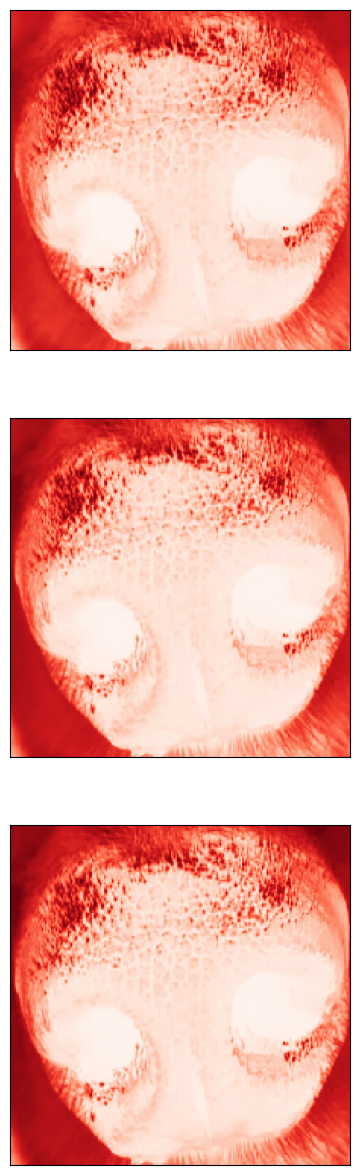

In [93]:
import tensorflow as tf
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# VGG16 모델 불러오기
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False)

# 중간 계층의 출력을 리스트로 가져오기
layer_outputs = [layer.output for layer in base_model.layers]

# 중간 계층의 출력을 사용하는 모델 생성
model = Model(inputs=base_model.input, outputs=layer_outputs)

# 이미지를 VGG16 모델이 학습된 데이터셋의 분포에 맞게 전처리
img = tf.keras.preprocessing.image.load_img(img3_path, target_size=(224, 224))
img = tf.keras.preprocessing.image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = tf.keras.applications.vgg16.preprocess_input(img)

# 이미지에서 특징 맵 생성
feature_maps = model.predict(img)

# 첫 번째 특징 맵의 채널 수를 가져오기
num_channels = feature_maps[0].shape[-1]

# 첫 번째 특징 맵을 시각화
plt.figure(figsize=(15, 15))
for i in range(num_channels):
    plt.subplot(num_channels, 1, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(feature_maps[0][0, :, :, i], cmap='Reds')
plt.show()


1/1 [==============================] - 1s 693ms/step


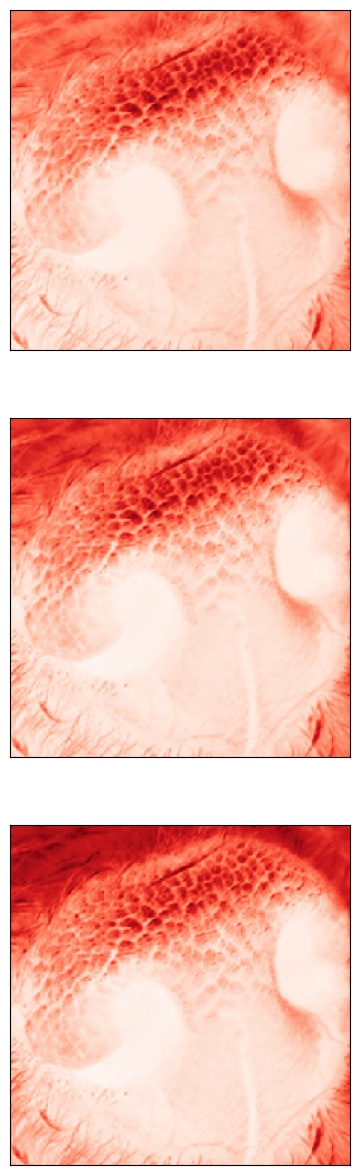

In [94]:
import tensorflow as tf
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# VGG16 모델 불러오기
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False)

# 중간 계층의 출력을 리스트로 가져오기
layer_outputs = [layer.output for layer in base_model.layers]

# 중간 계층의 출력을 사용하는 모델 생성
model = Model(inputs=base_model.input, outputs=layer_outputs)

# 이미지를 VGG16 모델이 학습된 데이터셋의 분포에 맞게 전처리
img = tf.keras.preprocessing.image.load_img(img4_path, target_size=(224, 224))
img = tf.keras.preprocessing.image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = tf.keras.applications.vgg16.preprocess_input(img)

# 이미지에서 특징 맵 생성
feature_maps = model.predict(img)

# 첫 번째 특징 맵의 채널 수를 가져오기
num_channels = feature_maps[0].shape[-1]

# 첫 번째 특징 맵을 시각화
plt.figure(figsize=(15, 15))
for i in range(num_channels):
    plt.subplot(num_channels, 1, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(feature_maps[0][0, :, :, i], cmap='Reds')
plt.show()


In [14]:
result = DeepFace.verify(enforce_detection = False, 
                         img1_path = "/content/drive/MyDrive/dog_nose/test_images/dog4_1.PNG", 
                         img2_path = "/content/drive/MyDrive/dog_nose/test_images/dog6_1.jpg",
                         distance_metric = metrics[0]
                         )
print(result)

{'verified': True, 'distance': 0.304073417392665, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 0, 'y': 0, 'w': 1125, 'h': 1364}, 'img2': {'x': 0, 'y': 0, 'w': 828, 'h': 1104}}, 'time': 5.79}


In [15]:
result = DeepFace.verify(enforce_detection = False, 
                         img1_path = "/content/drive/MyDrive/dog_nose/test_images/dog5_1.PNG", 
                         img2_path = "/content/drive/MyDrive/dog_nose/test_images/dog6_1.jpg",
                         distance_metric = metrics[0]
                         )
print(result)

{'verified': True, 'distance': 0.31550812346341794, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 0, 'y': 0, 'w': 937, 'h': 1052}, 'img2': {'x': 0, 'y': 0, 'w': 828, 'h': 1104}}, 'time': 5.44}


In [16]:
result = DeepFace.verify(enforce_detection = False, 
                         img1_path = "/content/drive/MyDrive/dog_nose/test_images/dog6_2.jpg", 
                         img2_path = "/content/drive/MyDrive/dog_nose/test_images/dog6_1.jpg",
                         distance_metric = metrics[0]
                         )
print(result)

{'verified': True, 'distance': 0.10118514769903253, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 0, 'y': 0, 'w': 828, 'h': 1104}, 'img2': {'x': 0, 'y': 0, 'w': 828, 'h': 1104}}, 'time': 4.32}


In [22]:
result = DeepFace.verify(enforce_detection = False, 
                         img1_path = "/content/drive/MyDrive/dog_nose/test_images/nose/dog6_2.png", 
                         img2_path = "/content/drive/MyDrive/dog_nose/test_images/nose/dog6_1.png",
                         distance_metric = metrics[2]
                         )
print(result)

{'verified': True, 'distance': 0.14464666874218612, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 0, 'y': 0, 'w': 268, 'h': 192}, 'img2': {'x': 0, 'y': 0, 'w': 362, 'h': 362}}, 'time': 1.28}


In [23]:
result = DeepFace.verify(enforce_detection = False, img1_path = "/content/drive/MyDrive/dog_nose/test_images/nose/dog6_2.png", img2_path = "/content/drive/MyDrive/dog_nose/test_images/nose/dog6_1.png")

In [24]:
print(result)

{'verified': True, 'distance': 0.057913203131070734, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 0, 'y': 0, 'w': 408, 'h': 418}, 'img2': {'x': 0, 'y': 0, 'w': 362, 'h': 362}}, 'time': 1.34}


In [63]:
!pwd

/content/drive/MyDrive/deepface
